# Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_df = pd.read_csv('data/SAMPLE_DATAv1.csv')

In [3]:
raw_df.shape

(223192, 6)

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223192 entries, 0 to 223191
Data columns (total 6 columns):
client_ID     223192 non-null int64
order_date    223192 non-null object
LVL2_ID       223167 non-null float64
product_ID    223192 non-null object
sum_rub       223192 non-null float64
sum_cnt       223192 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 10.2+ MB


In [5]:
raw_df.describe()

,client_ID,LVL2_ID,sum_rub,sum_cnt
count,2.231920e+05,223167.000000,223192.000000,223192.000000
mean,8.575350e+07,4268.998920,216.682019,1.844520
std,2.484671e+07,11456.916355,340.550491,2.607712
min,9.000000e+01,1.000000,0.000000,0.080000
25%,9.156026e+07,1010.000000,78.000000,1.000000
50%,9.329922e+07,1013.000000,133.200000,1.000000
75%,9.374170e+07,1019.000000,239.380500,2.000000
max,9.821401e+07,99001.000000,23052.000000,240.000000


In [6]:
raw_df.isnull().sum()

client_ID      0
order_date     0
LVL2_ID       25
product_ID     0
sum_rub        0
sum_cnt        0
dtype: int64

In [7]:
raw_df.head()

,client_ID,order_date,LVL2_ID,product_ID,sum_rub,sum_cnt
0,90,31/01/2018,13002.0,_x0033_286542,41.5,1.0
1,90,31/01/2018,1001.0,_x0033_341612,210.0,1.0
2,90,07/02/2018,3019.0,_x0033_156604,99.0,1.0
3,90,07/02/2018,1002.0,_x0033_243437,41.4,1.0
4,90,14/02/2018,1011.0,_x0032_002127,97.5,2.5


In [8]:
def preprocess(df):
    df['order_date'] = df['order_date'].apply(pd.Timestamp)
    return df

In [9]:
preprocessed_df = preprocess(raw_df)

In [10]:
print(preprocessed_df.order_date.min(),preprocessed_df.order_date.max())

2017-01-02 00:00:00 2018-12-10 00:00:00


In [11]:
preprocessed_df.client_ID.unique().shape

(21653,)

In [12]:
preprocessed_df.shape

(223192, 6)

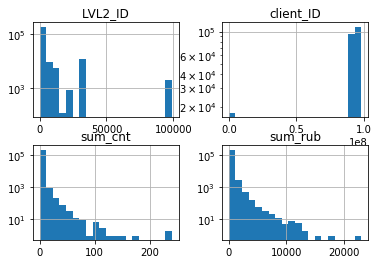

In [13]:
preprocessed_df.hist(bins=20, log=True);

In [14]:
print(preprocessed_df.sum_rub.min(), preprocessed_df.sum_rub.max())

0.0 23052.0


(array([2.22359e+05, 6.84000e+02, 9.00000e+01, 3.50000e+01, 1.30000e+01,
        8.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0. ,  2305.2,  4610.4,  6915.6,  9220.8, 11526. , 13831.2,
        16136.4, 18441.6, 20746.8, 23052. ]),
 <a list of 10 Patch objects>)

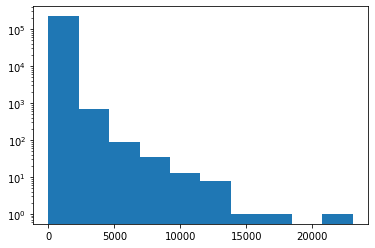

In [15]:
plt.hist(preprocessed_df.sum_rub, log=True)

In [16]:
preprocessed_df.sort_values(by=['order_date'])

,client_ID,order_date,LVL2_ID,product_ID,sum_rub,sum_cnt
24592,91073534,2017-01-02,1020.0,_x0033_206592,356.00,1.0
52517,91518932,2017-01-02,1010.0,_x0033_303840,40.13,1.0
87815,93070112,2017-01-02,1010.0,_x0033_183085,79.80,2.0
87814,93070112,2017-01-02,1012.0,_x0033_051232,124.50,3.0
87813,93070112,2017-01-02,1011.0,_x0032_011344,39.50,2.5
37706,91294139,2017-01-02,1013.0,_x0033_038363,95.80,1.0
19072,91019286,2017-01-02,1012.0,_x0033_057812,121.00,1.0
118662,93348269,2017-01-02,1010.0,_x0033_189399,115.00,1.0
148865,93611145,2017-01-02,1010.0,_x0033_300550,352.98,3.0
141059,93542689,2017-01-02,1011.0,_x0033_047178,164.40,2.0


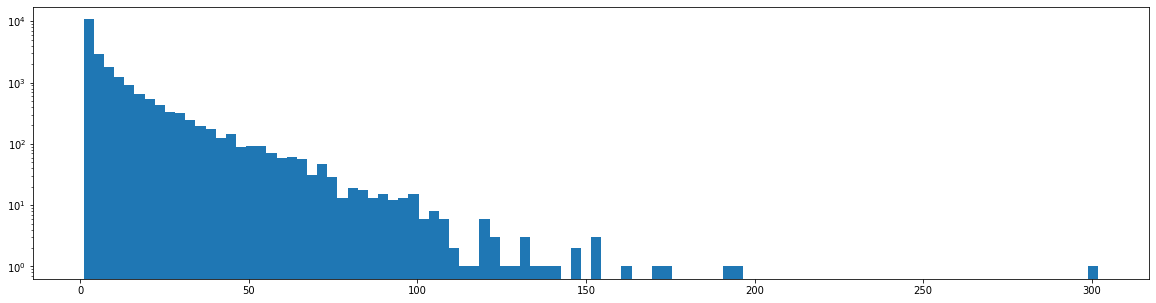

In [17]:
count = preprocessed_df.groupby('client_ID')['client_ID'].count()
plt.figure(figsize=(20,5))
plt.hist(count, log=True, bins=100)
plt.show();

TODO

Выделить признаки у покупателей, например средний интервал между покупками, средняя сумма покупки, состав корзины, время с последней покупки до текущего момента

Кластеризовать покупателей по этим признакам.

Нужно сделать определение "оттёкших" покупателей.